<a href="https://colab.research.google.com/github/purduelamm/purdue_me597_iiot/blob/main/lab/lab3/L3_Colab2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab 3.2 Power meter data collection using Modbus protocol


## 2.1 Python programming for data collection from power meter


The entire schematic of the data communication using Modbus protocol in case of multiple masters
(computers) and a single slave (power meter) is shown in Figure 12. In the lab, your computers (laptop and Raspberry Pi) are on the router network. The Modbus RTU to Modbus TCP converter (gateway) is also on the same network with a static IP address. The ethernet cable (RJ45) is used for connection between the router and the gateway. The data communication sequence to read data from power meter is as follows.

1.	The computer (Raspberry Pi or laptop) requests read (data) holding registers using Modbus TCP protocol via the router to the gateway.
2.	The gateway converts Modbus TCP packet frame to Modbus RTU data frame and sends it to the slave.
3.	The slave responds to the request and sends Modbus RTU data frame to the gateway.
4.	The gateway converts the received Modbus RTU data frame to Modbus TCP packet frame.
5.	The gateway sends the converted packet to a specific IP host which is the computer requested data.
6.	The computer receives Modbus TCP packet frame and interprets the packet to the data.

To do this, we will use Python and ‘pymodbus’ module. If you are interested in ‘pymodbus’ module in detail, please visit the website (https://pymodbus.readthedocs.io/en/latest/, available on Aug. 5, 2024).


<img src="https://github.com/purduelamm/purdue_me597_iiot/blob/main/lab/img/lab3_fig12.png?raw=true" width="90%">

*Figure 12 Schematic of communication for power meter data collection*

What you need to do first to use TCP/IP communication and application is to check network connectivity. By using ping test from Raspberry Pi, check the network connection between Raspberry Pi and the gateway.

 **The IP address of the gateway at Lab3**.
 <br/>
 Offline class : 192.168.1.100
  <br/>
<font color=”green”> Online class </font> : 10.165.67.146




### Task 2.1

Capture the results of checking network connection using ping test from both Raspberry Pi and laptop to the gateway for Modbus TCP as Figure 13 and attach it to the report.
*  Please note that the IP address of the gateway will be different from the example.


<img src="https://github.com/purduelamm/purdue_me597_iiot/blob/main/lab/img/lab3_fig13.png?raw=true" width="60%">

*Figure 13 Terminal window after ping test from Raspberry Pi to the gateway*





---

Place your screenshot for Task 2.1 here from Raspberry Pi
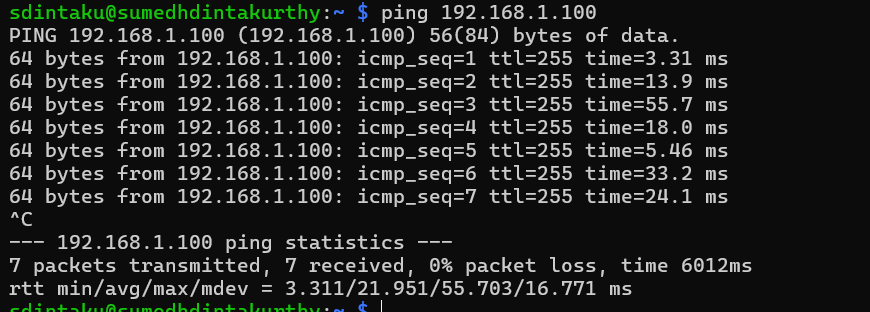
---





---

Place your screenshot for Task 2.1 here from laptop
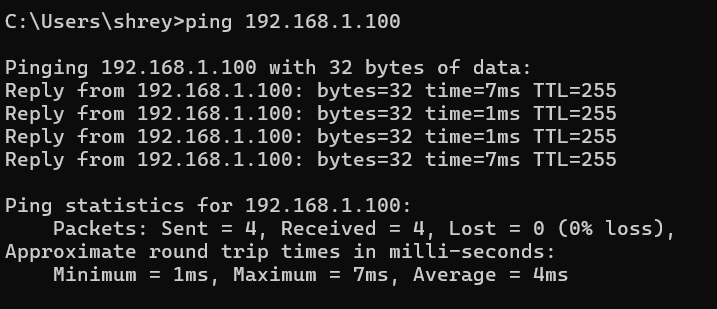
---



To read data from the power meter, we need to request to read registers via Modbus protocol. The selected primary data address of basic measurement of the power meter is shown in Table 2. There are hundreds of parameters (Modbus registers) that can be measured from the power meter. All Modbus map is on [AccuEnergy website](https://www.accuenergy.com/support/modbus-map/?modbus-map=acuvim-l-modbusmap). Or refer to Table 5-16 on page 109 of the manual ([Acuvim L User’s Manual.pdf](https://github.com/purduelamm/purdue_me597_iiot/blob/main/lab/lab3/Acuvim%20L%20User's%20Manual.pdf?raw=true)). Please note that the minimum refresh rate of holding registers of the power meter is about 250 msec which means you can collect 4 times per second. Therefore, your request interval should be larger than 250 msec.

*Table 2 Selected primary data address of basic measurement of the power meter*

<table width="671">
<tbody>
<tr>
<td width="106">
<p>Address (Hex)</p>
</td>
<td width="89">
<p>Address (Decimal)</p>
</td>
<td width="58">
<p>Symbol</p>
</td>
<td width="155">
<p>Parameter</p>
</td>
<td width="120">
<p>Range</p>
</td>
<td width="50">
<p>Unit</p>
</td>
<td width="68">
<p>Data Type</p>
</td>
<td width="110">
<p>Access Property</p>
</td>
</tr>
<tr>
<td width="106">
<p>0600H-0601H</p>
</td>
<td width="89">
<p>1536-1537</p>
</td>
<td width="58">
<p>F</p>
</td>
<td width="148">
<p>Frequency</p>
</td>
<td width="110">
<p>4500 ~ 6500</p>
</td>
<td width="40">
<p>Hz</p>
</td>
<td width="48">
<p>float</p>
</td>
<td width="72">
<p>R</p>
</td>
</tr>
<tr>
<td width="106">
<p>0602H-0603H</p>
</td>
<td width="89">
<p>1538-1538</p>
</td>
<td width="58">
<p>U1</p>
</td>
<td width="148">
<p>Phase 1 Voltage</p>
</td>
<td width="110">
<p>0 ~ 65535</p>
</td>
<td width="40">
<p>V</p>
</td>
<td width="48">
<p>float</p>
</td>
<td width="72">
<p>R</p>
</td>
</tr>
<tr>
<td width="106">
<p>060EH-060FH</p>
</td>
<td width="89">
<p>1550-1551</p>
</td>
<td width="58">
<p>I1</p>
</td>
<td width="148">
<p>Total Phase A Current</p>
</td>
<td width="110">
<p>0 ~ 65535</p>
</td>
<td width="40">
<p>A</p>
</td>
<td width="48">
<p>float</p>
</td>
<td width="72">
<p>R</p>
</td>
</tr>
<tr>
<td width="106">
<p>061CH-061DH</p>
</td>
<td width="89">
<p>1564-1565</p>
</td>
<td width="58">
<p>Psum</p>
</td>
<td width="148">
<p>Total System power</p>
</td>
<td width="110">
<p>-32768 ~ 32768</p>
</td>
<td width="40">
<p>W</p>
</td>
<td width="48">
<p>float</p>
</td>
<td width="72">
<p>R</p>
</td>
</tr>
<tr>
<td width="106">
<p>0624H-0623H</p>
</td>
<td width="89">
<p>1572-1573</p>
</td>
<td width="58">
<p>Qsum</p>
</td>
<td width="148">
<p>Total Reactive power</p>
</td>
<td width="110">
<p>-32768 ~ 32768</p>
</td>
<td width="40">
<p>var</p>
</td>
<td width="48">
<p>float</p>
</td>
<td width="72">
<p>R</p>
</td>
</tr>
<tr>
<td width="106">
<p>0626H-0627H</p>
</td>
<td width="89">
<p>1574-1575</p>
</td>
<td width="58">
<p>Ssum</p>
</td>
<td width="148">
<p>Total Apparent Power</p>
</td>
<td width="110">
<p>0 ~ 65535</p>
</td>
<td width="40">
<p>VA</p>
</td>
<td width="48">
<p>float</p>
</td>
<td width="72">
<p>R</p>
</td>
</tr>
<tr>
<td width="106">
<p>0628EH-062FH</p>
</td>
<td width="89">
<p>1582-1583</p>
</td>
<td width="58">
<p>PFsum</p>
</td>
<td width="148">
<p>Total Power Factor</p>
</td>
<td width="110">
<p>-1000 ~ 1000</p>
</td>
<td width="40">
<p>-</p>
</td>
<td width="48">
<p>float</p>
</td>
<td width="72">
<p>R</p>
</td>
</tr>
</tbody>
</table>

---

**<img src="https://github.com/purduelamm/purdue_me597_iiot/blob/main/lab/img/icon_Python.png?raw=tru" width="20">Python - Python 3 ([lab3_sample1.py](https://github.com/purduelamm/purdue_me597_iiot/blob/main/lab/lab3/lab3_sample1.py?raw=true))**

```
from pymodbus.client.sync import ModbusTcpClient
from pymodbus.constants import Endian
from pymodbus.payload import BinaryPayloadDecoder
import datetime

host = "192.168.1.100"  # Online student with Cisco VPN: "10.165.67.146"
port = 502

client = ModbusTcpClient(host, port=port)

if not client.connect():
    raise RuntimeError(f"Connect failed: {host}:{port}")

now = datetime.datetime.now()

freq_read = client.read_holding_registers(1536, count=2, unit=1)

if freq_read.isError():
    client.close()
    raise RuntimeError(f"Modbus read error: {freq_read}")

freq_reg = freq_read.registers

decoder = BinaryPayloadDecoder.fromRegisters(
    freq_reg,
    byteorder=Endian.Big,
    wordorder=Endian.Big
)


freq_value = decoder.decode_32bit_float()

print(f"{now}: Frequency is {freq_value} Hz")

client.close()


```

---

The sample code 1 (lab3_sample1.py) is given as above. This code is to print out a timestamp and the measured frequency from the power meter as Figure 12. As expected, the measured frequency is 60 Hz. Please refer to the comments on the script for the descriptions. Please note that the read values of registers by Modbus protocol are encoded and it may be differed by the device. In this case, the register values are decoded by Big Endian Byte order. For the details of understanding Byte order encoding and decoding, please visit the website (https://www.digital-detective.net/understanding-big-and-little-endian-byte-order/, available on Feb. 1, 2023).

### Task 2.2

Run the sample code 1 and then capture and attach the result as Figure 14.
* Capture either one of terminal window as Figure 14 (top) or Thonny IDE Shell as Figure 14 (bottom) from Raspberry Pi.
* Try this on your laptop and see if it works as well.
* <font color=”green”> (Online class only) </font>
If you have trouble connecting network router, review L0_Colab1 1.9 Section.

<img src="https://github.com/purduelamm/purdue_me597_iiot/blob/main/lab/img_S26_update/Lab3_fig14.PNG?raw=true" width="100%">

*Figure 14 Results of running sample code 1: terminal window (top) and Thonny IDE shell (bottom)*



---

Place your screenshot for Task 2.2 here from Raspberry Pi
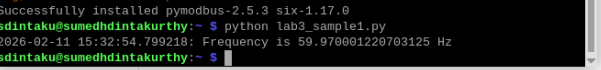
---



### Task 2.3

1.	Modify sample code 1 to collect power meter data for at least 1 minute and save data as a CSV file.

* You can use one computer either laptop or Raspberry Pi.
* Hint: Make a function (method) to convert received registers to a float value. An input argument is a set of registers read and the output is a float value.
* Set the sampling period 1 second. (Hint: use ‘while’ loop and ‘time’ package)
* Data (header) should include time, frequency, voltage, current, power factor, and true power as Table 3. Note that you have to make sure the unit of each data.
* Refer to the sample codes in previous lab manuals ('while' loop and saving CSV file).
* As a practice, plot data and calculate time-domain features.

*Table 3 Example data of output CSV file for Task 2.3*

<table width="671">
<tbody>
<tr>
<td width="90">
<p>Time [sec]</p>
</td>
<td width="114">
<p>Frequency [Hz]</p>
</td>
<td width="102">
<p>Voltage 1 [V]</p>
</td>
<td width="108">
<p>Current 1 [A]</p>
</td>
<td width="126">
<p>Power factor [-]</p>
</td>
<td width="132">
<p>True power [W]</p>
</td>
</tr>
<tr>
<td width="90">
<p>&nbsp;</p>
</td>
<td width="114">
<p>&nbsp;</p>
</td>
<td width="102">
<p>&nbsp;</p>
</td>
<td width="108">
<p>&hellip;</p>
</td>
<td width="126">
<p>&nbsp;</p>
</td>
<td width="132">
<p>&nbsp;</p>
</td>
</tr>
<tr>
<td width="90">
<p>30.17739</p>
</td>
<td width="114">
<p>60.0008443</p>
</td>
<td width="102">
<p>119.73915</p>
</td>
<td width="108">
<p>2.481679</p>
</td>
<td width="126">
<p>0.744922</p>
</td>
<td width="132">
<p>221.9443</p>
</td>
</tr>
<tr>
<td width="90">
<p>31.204921</p>
</td>
<td width="114">
<p>60.0007994</p>
</td>
<td width="102">
<p>120.011049</p>
</td>
<td width="108">
<p>2.452804</p>
</td>
<td width="126">
<p>0.737972</p>
</td>
<td width="132">
<p>221.4492</p>
</td>
</tr>
<tr>
<td width="90">
<p>&nbsp;</p>
</td>
<td width="114">
<p>&nbsp;</p>
</td>
<td width="102">
<p>&nbsp;</p>
</td>
<td width="108">
<p>&hellip;</p>
</td>
<td width="126">
<p>&nbsp;</p>
</td>
<td width="132">
<p>&nbsp;</p>
</td>
</tr>
</tbody>
</table>
<p>&nbsp;</p>


In [ ]:
### Place your entire code for Task 2.3 here
# If you want, you can add more code below to load csv file and plot it.
from pymodbus.client.sync import ModbusTcpClient
from pymodbus.constants import Endian
from pymodbus.payload import BinaryPayloadDecoder
import datetime
import time
import csv
import numpy as np
import matplotlib.pyplot as plt

# ----------------------------
# Connection Settings
# ----------------------------
host = "192.168.1.100"
port = 502
unit_id = 1

# ----------------------------
# Function to Convert Registers to Float
# ----------------------------
def registers_to_float(registers):
    decoder = BinaryPayloadDecoder.fromRegisters(
        registers,
        byteorder=Endian.Big,
        wordorder=Endian.Big
    )
    return decoder.decode_32bit_float()


# ----------------------------
# Create Modbus Client
# ----------------------------
client = ModbusTcpClient(host, port=port)

if not client.connect():
    raise RuntimeError(f"Connection failed: {host}:{port}")

print("Connected to Power Meter...")

# ----------------------------
# CSV File Setup
# ----------------------------
filename = "power_meter_data.csv"

with open(filename, mode='w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow([
        "Time",
        "Frequency (Hz)",
        "Voltage (V)",
        "Current (A)",
        "Power Factor",
        "True Power (W)"
    ])

    # ----------------------------
    # Data Collection (1 minute)
    # ----------------------------
    start_time = time.time()
    duration = 60   # seconds
    sampling_period = 1  # seconds

    freq_list = []
    volt_list = []
    curr_list = []
    pf_list = []
    power_list = []

    while (time.time() - start_time) < duration:

        now = datetime.datetime.now()

        # ---- Read Registers (Modify addresses based on your meter manual) ----
        freq = client.read_holding_registers(1536, count=2, unit=unit_id)
        voltage = client.read_holding_registers(1538, count=2, unit=unit_id)
        current = client.read_holding_registers(1540, count=2, unit=unit_id)
        pf = client.read_holding_registers(1542, count=2, unit=unit_id)
        power = client.read_holding_registers(1544, count=2, unit=unit_id)

        if not freq.isError():
            freq_value = registers_to_float(freq.registers)
            volt_value = registers_to_float(voltage.registers)
            curr_value = registers_to_float(current.registers)
            pf_value = registers_to_float(pf.registers)
            power_value = registers_to_float(power.registers)

            # Save in lists for analysis
            freq_list.append(freq_value)
            volt_list.append(volt_value)
            curr_list.append(curr_value)
            pf_list.append(pf_value)
            power_list.append(power_value)

            # Write to CSV
            writer.writerow([
                now,
                freq_value,
                volt_value,
                curr_value,
                pf_value,
                power_value
            ])

            print(f"{now} | Freq={freq_value:.2f}Hz | V={volt_value:.2f}V | "
                  f"I={curr_value:.2f}A | PF={pf_value:.3f} | P={power_value:.2f}W")

        time.sleep(sampling_period)

client.close()
print("Data collection finished. CSV saved.")

# ----------------------------
# Time-Domain Feature Extraction
# ----------------------------

def time_features(signal):
    signal = np.array(signal)
    return {
        "Mean": np.mean(signal),
        "RMS": np.sqrt(np.mean(signal**2)),
        "Std Dev": np.std(signal),
        "Max": np.max(signal),
        "Min": np.min(signal)
    }

print("\n--- Time Domain Features ---")
print("Voltage:", time_features(volt_list))
print("Current:", time_features(curr_list))
print("True Power:", time_features(power_list))

# ----------------------------
# Plot Data
# ----------------------------
plt.figure(figsize=(10,6))
plt.plot(volt_list, label="Voltage (V)")
plt.plot(curr_list, label="Current (A)")
plt.plot(power_list, label="True Power (W)")
plt.legend()
plt.title("Power Meter Measurements (1 min)")
plt.xlabel("Sample Number")
plt.ylabel("Magnitude")
plt.grid()
plt.show()



<br></br>
Please continue to [Lab 3.3 here](https://colab.research.google.com/github/purduelamm/purdue_me597_iiot/blob/main/lab/lab3/L3_Colab3.ipynb).
